<h2>Inspecting new images</h2>

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

In [2]:
f1 = fits.open('M42_r.fts')
data_r = f1[0].data
f1.close()
f2 = fits.open('M42_V.fts')
data_g = f2[0].data
f2.close()
f3 = fits.open('M42_B.fts')
data_b = f3[0].data
f3.close()

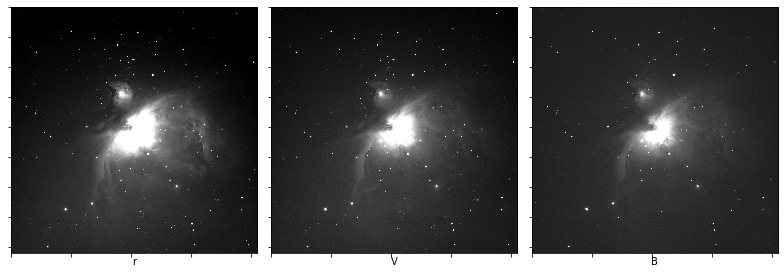

In [3]:
# quickly set up figure + subplots
# this way is easier than creating a separate figure object for each image
fig, ax = plt.subplots(1, 3, figsize=(11,4))
# remove annoying ticklabels
plt.setp([a.get_xticklabels() + a.get_yticklabels() for a in ax], visible=False)
# display all images and adjust vmin and vmax manually
ax[0].imshow(data_r, vmin=5000, vmax=15000, cmap='Greys_r')
ax[0].set_xlabel('r')
ax[1].imshow(data_g, vmin=4000, vmax=12000, cmap='Greys_r')
ax[1].set_xlabel('V')
ax[2].imshow(data_b, vmin=1500, vmax=8000, cmap='Greys_r')
ax[2].set_xlabel('B')
fig.tight_layout()

<h2>Create a RGB image</h2>

In [4]:
import aplpy

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Red: [aplpy.rgb]
INFO: vmin =  4.692e+03 (auto) [aplpy.rgb]
INFO: vmax =  5.376e+04 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  4.122e+03 (auto) [aplpy.rgb]
INFO: vmax =  2.648e+04 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  2.082e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.069e+04 (auto) [aplpy.rgb]


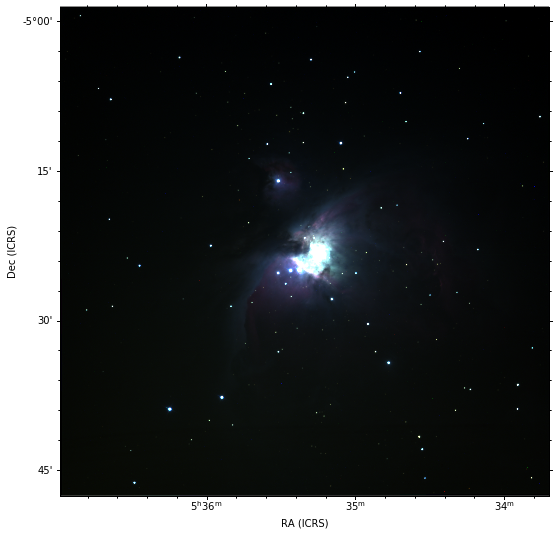

In [5]:
# Reproject the images to a common projection - this will also
# produce 2mass_cube_2d.fits
aplpy.make_rgb_cube(['M42_r.fts', 'M42_V.fts',
                     'M42_B.fts'], 'M42_cube.fits')

# Make an RGB image
aplpy.make_rgb_image('M42_cube.fits', 'M42_rgb.png')

# Plot the RGB image using the 2d image to indicate the projection
f = aplpy.FITSFigure('M42_cube_2d.fits')
f.show_rgb('M42_rgb.png')